In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data.csv")

# Success - Display the first record
display(data.head(n=1))

#data[(data.income == '<=50K')].shape[0] + data[(data.income == '>50K')].shape[0]
# df[(df.points > 13) & (df.assists > 7)]

#np.round(data[(data.income == '>50K')].shape[0] / data.shape[0] * 100, 2)

,R_1_len,R_1_wid,R_2_len,R_2_wid,R_3_len,R_3_wid,R_4_len,R_4_wid,R_5_len,R_5_wid,...,R_16_wid,R_17_len,R_17_wid,R_18_len,R_18_wid,R_19_len,R_19_wid,R_20_len,R_20_wid,Optimum
0,0.966,0.7614,0.9072,0.5335,0.8823,0.5267,0.8428,0.7142,0.7981,0.6291,...,0.0649,0.2184,0.4249,0.1438,0.0435,0.1339,0.4128,0.133,0.1543,1


In [12]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where sort is optimum
n_opt = data[(data.Optimum == 1)].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_not_opt = data[(data.Optimum == 0)].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = np.round(n_opt / n_not_opt * 100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_opt))
print("Individuals making at most $50,000: {}".format(n_not_opt))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 70000
Individuals making more than $50,000: 10000
Individuals making at most $50,000: 60000
Percentage of individuals making more than $50,000: 16.67%


In [13]:
# Split the data into features and target label
optimum_raw = data['Optimum']
features_raw = data.drop('Optimum', axis = 1)


optimum_raw.shape

(70000,)

In [14]:
display(features_raw.head(n = 5))

,R_1_len,R_1_wid,R_2_len,R_2_wid,R_3_len,R_3_wid,R_4_len,R_4_wid,R_5_len,R_5_wid,...,R_16_len,R_16_wid,R_17_len,R_17_wid,R_18_len,R_18_wid,R_19_len,R_19_wid,R_20_len,R_20_wid
0,0.9660,0.7614,0.9072,0.5335,0.8823,0.5267,0.8428,0.7142,0.7981,0.6291,...,0.2299,0.0649,0.2184,0.4249,0.1438,0.0435,0.1339,0.4128,0.1330,0.1543
1,0.9660,0.7614,0.4180,0.7412,0.3114,0.7156,0.8428,0.7142,0.6306,0.6866,...,0.6247,0.1661,0.1330,0.1543,0.2299,0.0649,0.1438,0.0435,0.6728,0.0012
2,0.3114,0.7156,0.6306,0.6866,0.6548,0.5198,0.1438,0.0435,0.9072,0.5335,...,0.2184,0.4249,0.8823,0.5267,0.7981,0.6291,0.1330,0.1543,0.1339,0.4128
3,0.9660,0.7614,0.8428,0.7142,0.7981,0.6291,0.6306,0.6866,0.9072,0.5335,...,0.3130,0.1948,0.1330,0.1543,0.2299,0.0649,0.1438,0.0435,0.6728,0.0012
4,0.8428,0.7142,0.8823,0.5267,0.4180,0.7412,0.1339,0.4128,0.1330,0.1543,...,0.9072,0.5335,0.3130,0.1948,0.7981,0.6291,0.2184,0.4249,0.6728,0.0012


In [15]:
features_final = features_raw

optimum = optimum_raw

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

40 total features after one-hot encoding.
['R_1_len', 'R_1_wid', 'R_2_len', 'R_2_wid', 'R_3_len', 'R_3_wid', 'R_4_len', 'R_4_wid', 'R_5_len', 'R_5_wid', 'R_6_len', 'R_6_wid', 'R_7_len', 'R_7_wid', 'R_8_len', 'R_8_wid', 'R_9_len', 'R_9_wid', 'R_10_len', 'R_10_wid', 'R_11_len', 'R_11_wid', 'R_12_len', 'R_12_wid', 'R_13_len', 'R_13_wid', 'R_14_len', 'R_14_wid', 'R_15_len', 'R_15_wid', 'R_16_len', 'R_16_wid', 'R_17_len', 'R_17_wid', 'R_18_len', 'R_18_wid', 'R_19_len', 'R_19_wid', 'R_20_len', 'R_20_wid']


In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    optimum, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 56000 samples.
Testing set has 14000 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [24]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
#from sklearn.metrics import fbeta_score

income = optimum_raw

TP = np.sum(income)
FP = income.count() - TP

TN = 0
FN = 0


# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.25
beta_sqr = beta * beta
fscore = (1 + beta_sqr) * (precision * recall) / ((beta_sqr * precision) + recall )

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1429, F-score: 0.1504]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

**1. Decision Trees**
- Describe one real-world application in industry where the model can be applied.

     *Medical models:* Wikipedia mentions an example where a decision tree estimates the probability of kyphosis after surgery, given the age of the patient and the vertebra at which surgery was started. 
      
     [Wikipedia entry on decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
      
     *Recommendation apps:* recommendation engines like [Spotitify BaRT are based on decision trees](https://www.datasciencecentral.com/profiles/blogs/how-spotify-know-a-lot-about-you-using-machine-learning-and-ai).
            

- What are the strengths of the model; when does it perform well?

    - It is simple to understand and to interpret. Trees can be easily be visualised.

    - Requires little data preparation. Other techniques often require data normalisation, one hot encoding, etc.

    - It's good fitted for large data sets, as it has logarithmic cost wrt. the number of data points used to train the tree.

    - Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
    
    [SciKit Learn DecisionTree Documentation](https://scikit-learn.org/stable/modules/tree.html)

- What are the weaknesses of the model; when does it perform poorly?

    - Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.
      This may require extra tuning effort like pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

    - Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem can be mitigated by using decision trees within an ensemble.

    - Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

    - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
    
    [SciKit Learn DecisionTree Documentation](https://scikit-learn.org/stable/modules/tree.html)

- What makes this model a good candidate for the problem, given what you know about the data?

    - We have a large set of input data so having a model with only logarithmic costs will give good performance
    - A decision tree is simple to understand and interpret. So even if it might be not optimal to use it in our case with unbalanced data (only 24% of the records are in the >50K group), it will still be a useful reference point.


**2. Gaussian Naive Bayes**
- Describe one real-world application in industry where the model can be applied.

    *Spam detection*: As we have seen in the classroom that the GaussianNB did quite well at detecting spam Text messages.
    
    *Person and document classification:* [According to Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) many classification problems can be successfully solved with Naive Bayes approaches.
    
- What are the strengths of the model; when does it perform well?

    - In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. 
    - They require a small amount of training data to estimate the necessary parameters. 

    - Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods.
    
    [Scikit learn documentation on Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

- What are the weaknesses of the model; when does it perform poorly?

    - On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator.
    
    - If the naive assumption of feature independence is not true, result may be drastically wrong.
    
    [Scikit learn documentation on Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

- What makes this model a good candidate for the problem, given what you know about the data?

    - Naive Bayes has a good track record for Person classifictation problems, so its a good candidate on our data.
    
    - Performance should be good even for our large data set.

**3. AdaBoost with Decsision trees**
- Describe one real-world application in industry where the model can be applied.
 
    *All classifications that Decision Trees are good at* (see No. 1)
    
    *Fault diagnosis*: detecting process faults [Fault diagnosis using AdaBoost](https://www.sciencedirect.com/science/article/abs/pii/S0952197620300907) 
    
- What are the strengths of the model; when does it perform well?

    - Adaptive Boosting (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier.
    - The AdaBoost training process selects only those features known to improve the predictive power of the model, reducing dimensionality and potentially improving execution time as irrelevant features don't need to be computed.
    
    [Wikipedia article on AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)

- What are the weaknesses of the model; when does it perform poorly?

    - Boosting technique learns progressively, it is important to ensure that you have quality data. 
    - AdaBoost is also extremely sensitive to Noisy data and outliers so if you do plan to use AdaBoost then it is highly recommended to eliminate them.
    - AdaBoost has also been proven to be slower than other boosting algorithms like XGBoost.
    
    [A Guide to AdaBoost: Boosting To Save The Day](https://blog.paperspace.com/adaboost-optimizer/)

- What makes this model a good candidate for the problem, given what you know about the data?

    - Our input data has 103 features, so reducing the number of relevant featured in may be a good idea
    - By scaling we have already made sure that our input data is well-behaved and won't disturb the AdaBoost algorithm. 

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [18]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size].values.ravel())
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)    
    predictions_train = learner.predict(X_train.head(300))
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 560 samples.
DecisionTreeClassifier trained on 5600 samples.
DecisionTreeClassifier trained on 56000 samples.
GaussianNB trained on 560 samples.
GaussianNB trained on 5600 samples.
GaussianNB trained on 56000 samples.
AdaBoostClassifier trained on 560 samples.
AdaBoostClassifier trained on 5600 samples.
AdaBoostClassifier trained on 56000 samples.


/home/tom/play/CuttingStock/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


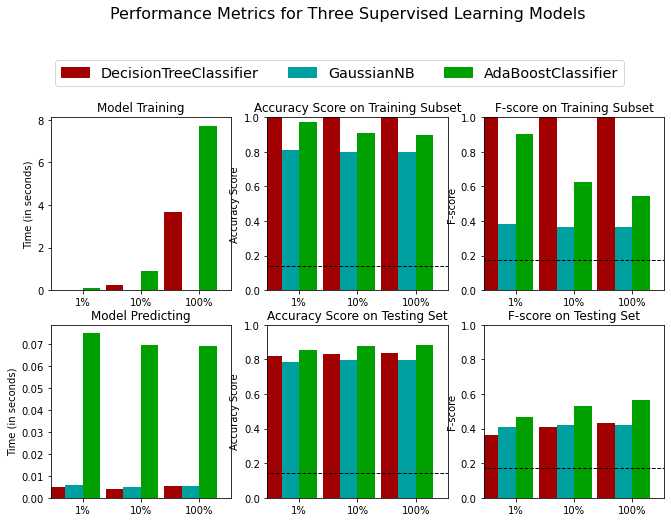

In [19]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = AdaBoostClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = samples_100 // 10
samples_1 = samples_10 // 10

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
By looking at the chart I recommend to choose AdaBoost as the model to go ahead with. Here is why:

- the decision tree (DT) model has a very high F-score on the training subset but on the actual testing set its F-score is much smaller. This is an indication of an overfitting model. It seems the DT just "memorizes" all data points of the training subset but is not able to predict well against the testing set. It does not generalize well.

- the Gaussian Naive Bayes (NB) model has the F-score for training and testing set on the same level. But it is not much better than the performance of the naive predictor (dashed horizontal line). So NB won't help us to give reliable predictions. 

- The AdaBoost (AB) model also has F-score for training and testing set on the same level. But the F-score is much better than the naive predictor score (dashed horizontal line). So we can conclude that the NB model does not overfit and will be a good starting point to further improvements to reach an even better F-score.

    The AdaBoost training process selects only those features known to improve the predictive power of the model, reducing dimensionality. This will be helpful in our case where we have over 100 input features.
    
    The execution time for AdaBoost is significantly higher for both training and testing. For CharitityML we'll need a model with a high precision. That is if we predict a person to be in the >50K class it better should actually be in this class to avoid costs for sending out mailings to people who are not in the actual target group. 
    So if we choose AdaBoost with its higher CPU costs we still save overall as we can avoid costly mailings to the wrong candidates.
    With further optimizations AdaBoost will also allow to reduce the execution time in many cases.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [23]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42) 

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters = {#'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()], 
              'n_estimators': [50,200,300], 
              'learning_rate': [0.25,0.5,1,1.5]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=20)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train.values.ravel())

# Get the estimator
best_clf = grid_fit.best_estimator_

print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train.values.ravel())).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.25)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.25)))

AdaBoostClassifier(learning_rate=0.5, n_estimators=300, random_state=42)
Unoptimized model
------
Accuracy score on testing data: 0.8824
F-score on testing data: 0.6249

Optimized Model
------
Final accuracy score on the testing data: 0.8863
Final F-score on the testing data: 0.6419


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |                   |                 |
| F-score        |                   |   EXAMPLE       |


**Answer: **

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

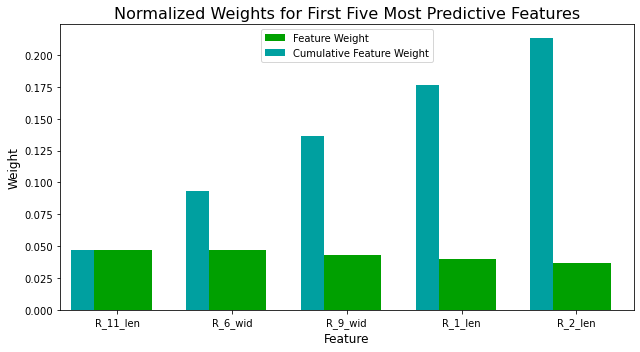

In [25]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf.fit(X_train, y_train.values.ravel())

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [38]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8612
F-score on testing data: 0.2856

Final Model trained on reduced data
------
Accuracy on testing data: 0.8575
F-score on testing data: 0.0801


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.